Model training and background on potionfinder.com

Import pandas to look at the scrapped dataset and import gensim to deploy doc2vec

In [3]:
import pandas as pd
import gensim

In [2]:
df = pd.read_csv('perfumedf_inproduction.csv')

The dataset contains information on the maker, perfume name, rating, year introduced, gender, and review. For this model, we will use only the perfume name (doc tag) and review (corpus).

In [3]:
df.head()

,availability,gender,maker,perfume,rating,review,year
0,In Production,Masculine,Versace,Versace l'Homme,3.728814,My review is for the current formulation. L'Ho...,1984
1,In Production,Shared / Unisex,Alyssa Ashley,Musk,3.303571,"Citrus, Jasmine, Musk, Rose, Carnation, Coumar...",1968
2,In Production,Feminine,Stephen Jones,Stephen Jones,3.396825,A HUGE burst of aldehydes quickly dries down t...,2008
3,In Production,Feminine,Editions de Parfums Frederic Malle,Portrait of a Lady,4.265672,I imagine there is not one perfume I would (li...,2010
4,In Production,Masculine,Versace,Versace pour Homme Oud Noir,4.000000,"Bitter Orange, Neroli, Pepper.Cardamom, Saffro...",2013


Define a function to preprocess the reviews for training with gensim

In [4]:
def read_corpus(documents):
    for i, text in enumerate(documents):
        test = text
        try:
            yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(text), [df.perfume[i]])
        except TypeError:
            print(test)
            pass

In [5]:
for text in enumerate(df.review[1]):
    print(text)

(0, 'C')
(1, 'i')
(2, 't')
(3, 'r')
(4, 'u')
(5, 's')
(6, ',')
(7, ' ')
(8, 'J')
(9, 'a')
(10, 's')
(11, 'm')
(12, 'i')
(13, 'n')
(14, 'e')
(15, ',')
(16, ' ')
(17, 'M')
(18, 'u')
(19, 's')
(20, 'k')
(21, ',')
(22, ' ')
(23, 'R')
(24, 'o')
(25, 's')
(26, 'e')
(27, ',')
(28, ' ')
(29, 'C')
(30, 'a')
(31, 'r')
(32, 'n')
(33, 'a')
(34, 't')
(35, 'i')
(36, 'o')
(37, 'n')
(38, ',')
(39, ' ')
(40, 'C')
(41, 'o')
(42, 'u')
(43, 'm')
(44, 'a')
(45, 'r')
(46, 'i')
(47, 'n')
(48, ',')
(49, ' ')
(50, 'A')
(51, 'm')
(52, 'b')
(53, 'e')
(54, 'r')
(55, ',')
(56, ' ')
(57, 'V')
(58, 'a')
(59, 'n')
(60, 'i')
(61, 'l')
(62, 'l')
(63, 'a')
(64, ',')
(65, ' ')
(66, 'O')
(67, 'r')
(68, 'r')
(69, 'i')
(70, 's')
(71, ' ')
(72, 'R')
(73, 'o')
(74, 'o')
(75, 't')
(76, '.')
(77, 'I')
(78, ' ')
(79, 's')
(80, 'u')
(81, 'p')
(82, 'p')
(83, 'o')
(84, 's')
(85, 'e')
(86, ' ')
(87, 't')
(88, 'h')
(89, 'e')
(90, ' ')
(91, 'f')
(92, 'i')
(93, 'r')
(94, 's')
(95, 't')
(96, ' ')
(97, 't')
(98, 'h')
(99, 'i')
(100, 'n')

(1461, 'i')
(1462, 'n')
(1463, 'g')
(1464, ' ')
(1465, 't')
(1466, 'h')
(1467, 'r')
(1468, 'o')
(1469, 'u')
(1470, 'g')
(1471, 'h')
(1472, ' ')
(1473, 'i')
(1474, 'n')
(1475, ' ')
(1476, 't')
(1477, 'h')
(1478, 'e')
(1479, ' ')
(1480, 'b')
(1481, 'a')
(1482, 's')
(1483, 'e')
(1484, ' ')
(1485, 'a')
(1486, 'n')
(1487, 'd')
(1488, ' ')
(1489, 'b')
(1490, 'e')
(1491, 'y')
(1492, 'o')
(1493, 'n')
(1494, 'd')
(1495, '.')
(1496, ' ')
(1497, 'S')
(1498, 'i')
(1499, 'l')
(1500, 'l')
(1501, 'a')
(1502, 'g')
(1503, 'e')
(1504, ' ')
(1505, 'i')
(1506, 's')
(1507, ' ')
(1508, 'a')
(1509, 'v')
(1510, 'e')
(1511, 'r')
(1512, 'a')
(1513, 'g')
(1514, 'e')
(1515, ' ')
(1516, 'w')
(1517, 'i')
(1518, 't')
(1519, 'h')
(1520, ' ')
(1521, 'l')
(1522, 'o')
(1523, 'n')
(1524, 'g')
(1525, 'e')
(1526, 'v')
(1527, 'i')
(1528, 't')
(1529, 'y')
(1530, ' ')
(1531, 'a')
(1532, 'p')
(1533, 'p')
(1534, 'r')
(1535, 'o')
(1536, 'x')
(1537, 'i')
(1538, 'm')
(1539, 'a')
(1540, 't')
(1541, 'e')
(1542, 'l')
(1543, 'y')
(154

There are a few nan errors, likely from empty reviews. We can safely ignore these.

In [6]:
train_corpus = list(read_corpus(df.review))

nan
nan
nan
nan
nan
nan
nan
nan
nan


Here's a couple of example reviews in our corpus. A large fraction of the words are adjectives that describe the fragrance.

In [7]:
train_corpus[:2]

[TaggedDocument(words=['my', 'review', 'is', 'for', 'the', 'current', 'formulation', 'homme', 'is', 'hands', 'down', 'the', 'best', 'masculine', 'fragrance', 'from', 'versace', 'though', 'the', 'competition', 'isn', 'very', 'stiff', 'it', 'is', 'classic', 'woody', 'leather', 'fragrance', 'it', 'opens', 'at', 'the', 'beginning', 'with', 'clean', 'sparkling', 'citrus', 'notes', 'of', 'lemon', 'the', 'citrus', 'gives', 'way', 'to', 'sharp', 'but', 'smooth', 'leather', 'note', 'with', 'hint', 'of', 'florals', 'as', 'the', 'woody', 'character', 'of', 'the', 'fragrance', 'comes', 'into', 'its', 'own', 'the', 'woody', 'leather', 'theme', 'is', 'retained', 'in', 'the', 'dry', 'down', 'as', 'the', 'floral', 'element', 'makes', 'room', 'for', 'faint', 'musky', 'note', 'homme', 'is', 'very', 'versatile', 'fragrance', 'with', 'decent', 'projection', 'and', 'longevity', 'it', 'not', 'my', 'favourite', 'fragrance', 'in', 'its', 'genre', 'prefer', 'the', 'superb', 'van', 'cleef', 'amp', 'arpels', 'po

Here we train three different models for comparison: 1) "model": distributed memory model, 2) "model_subsample": distributed memory model with subsampling frequency 1e-5, 3) "model_dbow": distributed bag of words model with negative sampling
(other models were tried as well, but not included here)

In [8]:
model = gensim.models.doc2vec.Doc2Vec(size=50, dm=1, min_count=2, iter=50)
model.build_vocab(train_corpus)
%time model.train(train_corpus, total_examples=model.corpus_count, epochs=model.iter)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/models/doc2vec.py:362: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/models/doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """Entry point for launching an IPython kernel.


CPU times: user 25min 18s, sys: 2min, total: 27min 18s
Wall time: 12min 30s


In [9]:
model_subsample = gensim.models.doc2vec.Doc2Vec(size=50, dm=1, min_count=2, iter=100, sample=1e-5)
model_subsample.build_vocab(train_corpus)
%time model_subsample.train(train_corpus, total_examples=model_subsample.corpus_count, epochs=model.iter)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/models/doc2vec.py:362: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/models/doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """Entry point for launching an IPython kernel.


CPU times: user 13min 1s, sys: 1min 53s, total: 14min 55s
Wall time: 9min 22s


In [10]:
model_dbow = gensim.models.doc2vec.Doc2Vec(size=50, dm=0, min_count=2, negative=5, iter=50)
model_dbow.build_vocab(train_corpus)
%time model_dbow.train(train_corpus, total_examples=model_dbow.corpus_count, epochs=model_dbow.iter)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/models/doc2vec.py:362: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/models/doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """Entry point for launching an IPython kernel.


CPU times: user 18min 39s, sys: 1min 1s, total: 19min 40s
Wall time: 9min 17s


Here we plot the most similar perfumes to the input search "flowerbomb," a popular floral perfume.

In [74]:
from pprint import pprint
import difflib
print(difflib.get_close_matches('flowerbomb', df.perfume, 1))
pprint(model.docvecs.most_similar(positive=difflib.get_close_matches('flowerbomb', df.perfume, 1)))

['Flowerbomb']
[('La Vie Est Belle', 0.9068676829338074),
 ('Fantasy', 0.8576025366783142),
 ('Hypnotic Poison Eau Sensuelle', 0.8547535538673401),
 ('Amor Amor', 0.833472728729248),
 ('Angel', 0.8286411762237549),
 ('Innocent', 0.8275986909866333),
 ('Pink Sugar', 0.8268875479698181),
 ('Dior Addict', 0.8207124471664429),
 ('Princess', 0.8204767107963562),
 ('Fancy', 0.818396806716919)]


In [12]:
print(difflib.get_close_matches('flowerbomb', df.perfume, 1))
pprint(model_subsample.docvecs.most_similar(positive=difflib.get_close_matches('flowerbomb', df.perfume, 1)))

['Flowerbomb']
[('Elie Saab Le Parfum', 0.6733473539352417),
 ('La Vie Est Belle', 0.6725860834121704),
 ('Hugo Pure Purple', 0.6673982739448547),
 ('Can Can Paris Hilton', 0.662361741065979),
 ('Innocent', 0.6582825779914856),
 ('Wish', 0.653344988822937),
 ('Angel', 0.6532328128814697),
 ('Hypnôse', 0.638688862323761),
 ('Valentina', 0.6378148794174194),
 ('Hypnotic Poison Eau Sensuelle', 0.6337730884552002)]


In [13]:
print(difflib.get_close_matches('flowerbomb', df.perfume, 1))
pprint(model_dbow.docvecs.most_similar(positive=difflib.get_close_matches('flowerbomb', df.perfume, 1)))

['Flowerbomb']
[('Lady Million', 0.6606640219688416),
 ('Angel', 0.6344294548034668),
 ('Coco Mademoiselle', 0.6332682967185974),
 ('Can Can Paris Hilton', 0.6219345331192017),
 ('Midnight Fleur ', 0.6206961870193481),
 ('Princess', 0.5972833633422852),
 ('Façonnable', 0.5862533450126648),
 ("Prada Candy L'Eau", 0.5842074155807495),
 ('Love and Luck for Women', 0.5827651023864746),
 ('Baby Phat Golden Goddess', 0.5803308486938477)]


Overall, the models distributed memory models identify some of the same perfumes as being most similar to "flowerbomb." However, the subsampled model has lower cosine similarities across the board. It is likely that subsampling is unnecessary for our corpus, as many of the words in the reviews are adjectives that describe the perfumes, and subsampling may get rid of some essential words.

The distributed bag of words model predicts somewhat different perfumes in association with "flowerbomb." Due to the qualitative nature of these associations, it is impossible to perform a rigorous validation of this model. Instead, we cross-validated these predictions with the "main accords" section on the website "fragrantica.com" and found that the distributed memory model without subsampling performs the best. The perfume "La Vie Est Belle" is frequently mentioned in online blog posts about perfumes similar to "flowerbomb."

Here are some of the perfumes that are negatively associated with "flowerbomb."

In [14]:
print(difflib.get_close_matches('flowerbomb', df.perfume, 1))
pprint(model.docvecs.most_similar(negative=difflib.get_close_matches('flowerbomb', df.perfume, 1)))

['Flowerbomb']
[('Vétiver de Puig', 0.3639378249645233),
 ('Eau des 4 Voleurs', 0.3377259373664856),
 ('Vetiver Hombre', 0.33085447549819946),
 ('Granville', 0.3308256268501282),
 ('Vetiver Royal Bourbon (new)', 0.3240063488483429),
 ('Equipage Géranium', 0.3225073218345642),
 ('Epicéa', 0.31838464736938477),
 ('Cyprès-Musc', 0.3181285858154297),
 ('Grafton', 0.3177714943885803),
 ('Mazzolari', 0.3166521489620209)]


In [15]:
print(difflib.get_close_matches('flowerbomb', df.perfume, 1))
pprint(model_subsample.docvecs.most_similar(negative=difflib.get_close_matches('flowerbomb', df.perfume, 1)))

['Flowerbomb']
[('Oud Minérale', 0.3414488434791565),
 ('The Fragrance Journals : 1962', 0.3396926820278168),
 ('Let Me Play The Lion', 0.3237929344177246),
 ("L'Eau Trois", 0.31123262643814087),
 ('Krizia Uomo', 0.30889806151390076),
 ('Bois Marocain', 0.30583417415618896),
 ('Cittá di Kyoto', 0.3043147623538971),
 ('Phoenicia', 0.3034292161464691),
 ('Marquis', 0.30006200075149536),
 ('Tom Ford Noir Anthracite', 0.2983548641204834)]


Again, these negative associations are difficult to evaluate, but one observation that jumps out is that the perfumes predicted to be most dissimilar to "flowerbomb" are all rather masculine. This makes sense, as "flowerbomb" is a particularly feminine fragrance.

We can also look at keyword associations, such as "floral." We find that generally the keyword associations match fairly well with the notes found in the predicted fragrances.

In [80]:
vec = model.infer_vector(['floral'])
model.docvecs.most_similar(positive=[vec], topn=20)

[('Musc et Freesia', 0.7333232760429382),
 ('Armani Privé Oranger Alhambra', 0.7259052395820618),
 ('Isotta Fraschini Profumo Uomo', 0.725715160369873),
 ('Armani Code Summer', 0.7133941650390625),
 ('Allure Homme Edition Blanche Eau de Parfum', 0.7128512263298035),
 ('Chloé Rose Edition', 0.7128045558929443),
 ("Ciel d'Airain", 0.7006070613861084),
 ('Ursa', 0.699537992477417),
 ('Nanadebary Bronze', 0.6992456316947937),
 ('Rose Velours', 0.6985301971435547),
 ('Fleurs de Bulgarie (original)', 0.6977048516273499),
 ('Cool Water Happy Summer', 0.6940541863441467),
 ('White Petals', 0.6886289119720459),
 ("L'Eau d'Issey Une Goutte de Nuage", 0.6858271360397339),
 ('Seveline - Vanille Bourbon / Bourbon Vanilla', 0.6853796243667603),
 ('Caprifoglio', 0.6816223859786987),
 ('Alien: Liqueur de Parfum', 0.6795877814292908),
 ('Mitsouko Fleur de Lotus', 0.6792057752609253),
 ('Love of Pink', 0.6771363019943237),
 ('Sheer Beauty', 0.668280839920044)]

In [18]:
model.save_word2vec_format('doc_tensor_perfume.w2v', doctag_vec=True, word_vec=False, binary=False)

In [19]:
model.save('doc_tensor_perfume.doc2vec')

Let's look at whether any interesting clusters emerge using kmeans

In [11]:
from sklearn.cluster import KMeans

In [21]:
doc_vectors = model.docvecs.doctag_syn0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """Entry point for launching an IPython kernel.


Some articles suggest that there are 5 main types of perfumes: oriental, woody/earthy, sweet, flowery/fruity, and fresh. Let's perform kmeans on 5 clusters.

In [54]:
num_clusters = 5

In [55]:
kmeans_clustering = KMeans( n_clusters = num_clusters )

In [56]:
idx = kmeans_clustering.fit_predict( doc_vectors )

Here we put the classified label with our perfumes.

In [57]:
d = []
word_centroid_list = list(zip(model.docvecs.offset2doctag, idx))
word_centroid_list_sort = sorted(word_centroid_list, key=lambda el: el[1], reverse=False)
for word_centroid in word_centroid_list_sort:
    line = word_centroid[0] + '\t' + str(word_centroid[1]) + '\n'
    #print(line)
    d.append({'perfume': word_centroid[0], 'category': word_centroid[1]})

Versace l'Homme	0

Sycomore Eau de Toilette	0

Original English Lavender / English Lavender	0

Erolfa	0

Vétiver Extraordinaire	0

Eloge du Traitre	0

Eaux de Caron Forte	0

Cuba 	0

Italian Bergamot	0

Je Suis Un Homme	0

Stetson	0

Monocle Scent Two: Laurel	0

New Zealand	0

Worth pour Homme	0

Moschino pour Homme	0

New-York	0

Epicéa	0

Mugler Cologne	0

Quorum	0

Green Valley	0

L'Ame d'un Héros	0

Endymion	0

masculin Pluriel	0

A Taste of Heaven	0

Gentlemen Only	0

1881 pour Homme	0

Bijan for Men	0

Rive Gauche pour Homme	0

Grey Flannel	0

Replica At the Barber's	0

Vetiver	0

Eau Sauvage Parfum (2017 version)	0

Aqua Velva Ice Blue	0

Halston Z-14	0

Black Collection : Moss	0

Mazzolari	0

Drakkar Noir	0

Eau Sauvage	0

Terre d'Hermès	0

Askew	0

Moss Breches	0

Acqua di Parma Colonia	0

Dunhill Edition	0

Eau Maximum	0

Aberdeen Lavender	0

Kouros	0

Guerlain Homme	0

Guerlain Homme L'Eau Boisée	0

Thunderstorm	0

Etienne Aigner No. 2	0

Private Number for Men	0

Vetiver Ro


Unforsaken	1

Notre Flore Jasmin / Jasmine	1

Madeline	1

Chocolovers	1

Pink Sugar Sensual	1

Les Elixirs Charnels - French Kiss	1

Waikiki Pikake	1

Miss Dior (previously Miss Dior Chérie)	1

Hermèssence Vanille Galante	1

Purple Fantasy	1

L'Eau par Kenzo	1

Pleasures Delight	1

Les Secrets de Sophie	1

Casamorati 1888 Regio	1

Roses Elixir	1

Scarlett	1

Sculpture	1

Une Ville, un Parfum : Tokyo	1

Amour de Cacao	1

Chocolat	1

Magnifique	1

Hypnôse Senses	1

Central Park West	1

Organza	1

D&amp;G; La Force 11	1

Fancy	1

Le Roi Empereur 	1

Jour d'Hermès	1

Noa	1

Clean Ultimate	1

Métaboles	1

Heat Rush	1

Fire &amp; Ice	1

Brit	1

Clean Shower Fresh	1

Burberry the Beat	1

Dragonfly	1

Cap d'Antibes	1

Violet Blonde	1

Louve	1

Vanilla &amp; Anise	1

Nectarine Blossom &amp; Honey	1

Fraîcheur Muskissime	1

Eau Mohéli	1

Prodigieux Le Parfum	1

Alien Eau Extraordinaire	1

Play-Doh	1

My Insolence	1

Gucci Eau de Parfum II	1

Burberry Body	1

Centrepiece	1

Ailleurs et Fleurs	1


Infanta En Flor	2

Boutonnière No.7	2

Une Rose	2

Au Delà Narcisse	2

Phul-Nana	2

Natori	2

Tea Rose	2

Volupté	2

Boucheron	2

Aperçu (new)	2

Bal à Versailles	2

Champs-Elysées	2

Oeillet Bengale	2

La Chasse Aux Papillons	2

Fleur de Thé Rose Bulgare	2

(Untitled)	2

Métal	2

Ubar Woman	2

L'Heure de Nuit	2

Cinnabar	2

Odalisque	2

Olène	2

Jaïpur	2

Tabu	2

Shalimar	2

Diorama	2

Diorissimo	2

Narciso Poudrée	2

L'Inspiratrice	2

Acqua di Parma Iris Nobile	2

Lady Stetson	2

Parfum d'Hermès	2

No. 1 for Men	2

Lovely	2

Opium	2

Infusion d'Iris	2

Fracas	2

Poison	2

L'Instant de Guerlain	2

Giò	2

Noir Epices	2

Rochas Femme (new)	2

White Shoulders	2

Aromatics Elixir	2

Chelsea Flowers	2

Aqua Allegoria Foliflora	2

Arpège	2

Visa	2

Toujours Moi	2

Perles de Lalique	2

Carnal Flower	2

Vol de Nuit	2

Youth Dew	2

Signature Collection : Nuit Noire	2

Iris Nazarena	2

Vohina	2

Dia Woman	2

Calandre	2

Agent Provocateur	2

Diorella	2

Bois des Îles Parfum	2

Red Door	2

Samsar

Relativamente Rosso	3

I Love New York for Marriage Equality	3

Perfume Calligraphy	3

Pegasus	3

Armani Privé Ambre Soie	3

Tobacco Rose	3

Ambre Précieux Ultime	3

Les Nombres d'Or : Vanille	3

Ashoka	3

Rousse	3

1270	3

Ambre Passion	3

Bois d'Ascèse	3

Oud	3

Tom Ford Noir	3

Rose Jam	3

HYLNDS - Spirit of the Glen	3

Perfume Calligraphy Rose	3

Rhinoceros	3

Perfume Calligraphy Saffron	3

Cuir X	3

John Varvatos Oud	3

L'Eau d'Ambre Extrême / Ambre Extrême	3

Back to Black	3

Private Label	3

Féminité du Bois	3

Gaïac	3

Honey Aoud	3

Elixir	3

Galaad	3

Fate Man	3

Espresso Royale	3

Breath of God	3

Forest Walk	3

Casamorati 1888 Bouquet Ideale	3

Messe de Minuit	3

Potion	3

Pot Pourri	3

L'Art et la Matière : Spiritueuse Double Vanille	3

Leather Oud	3

Patchouli Impérial	3

Peau d'Espagne	3

Crimes of Passion: Maxed Out	3

Tom Ford Noir Extreme	3

Cuir6	3

JHL	3

Bohemian Spice	3

Emir	3

Five O'Clock Au Gingembre	3

Un Bois de Sépia	3

Ummagumma	3

Black Phantom : Memento M

cK2	4

Light Blue Pour Homme Swimming in Lipari	4

Red for Men	4

24 Go Dark	4

Made to Measure	4

Oscar for Men	4

Armani Code Profumo	4

Givenchy Play Sport	4

Desire for a Man	4

Adidas Moves	4

Cool Water	4

1 Million	4

Le Mâle Essence de Parfum	4

Effusion for Him	4

Iceberg Twice Homme	4

Gold	4

Invictus	4

L.12.12 Blanc / White	4

Eight &amp; Bob	4

Gucci pour Homme II	4

L'Homme Sport	4

Invictus Aqua	4

Aqua Amara	4

Armani Mania	4

Armani Code Sport	4

One Man Show Gold Edition	4

Still Life	4

Usher for Men	4

Dolcelisir	4

Dolce &amp; Gabbana Pour Homme	4

Eau de Gaga	4

Scuderia Ferrari Black	4

Claiborne Sport	4

Ultra Mâle	4

Prada L'Homme	4

Altamir	4

Royal Vintage	4

Attimo pour Homme	4

Boss Bottled Night	4

Pineapple Vintage Noir	4

L'Eau Bleue d'Issey pour Homme	4

1 Million Privé	4

L'Eau d'Issey pour Homme Intense	4

Brit Rhythm for Him	4

Eau de Cedrat	4

Halloween Man	4

Aramis Black	4

Givenchy Play	4

L'Homme Idéal	4

L'Eau d'Issey pour Homme	4

Gentlemen O

In [58]:
df = pd.DataFrame(d)

We print the perfumes belonging to category 0 and find that a number of these fragrances are floral, woody, and aromatic. There is some preference for colognes and unisex perfumes.

In [64]:
df.loc[df['category'] == 0]

,category,perfume
0,0,Versace l'Homme
1,0,Sycomore Eau de Toilette
2,0,Original English Lavender / English Lavender
3,0,Erolfa
4,0,Vétiver Extraordinaire
5,0,Eloge du Traitre
6,0,Eaux de Caron Forte
7,0,Cuba
8,0,Italian Bergamot
9,0,Je Suis Un Homme


In [81]:
model = gensim.models.Doc2Vec.load('doc_tensor_perfume.doc2vec')
doc_vectors = model.docvecs.doctag_syn0
vocab = list(doc_vectors)
#print(doc_vectors)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  


In [6]:
len(vocab)

5324

Let's plot some visualizations of these clusters using PCA.

In [33]:
from sklearn.decomposition import PCA
import numpy as np

In [60]:
PCAresult = PCA(n_components=2).fit_transform(doc_vectors)
kmeans_clustering.fit(PCAresult)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

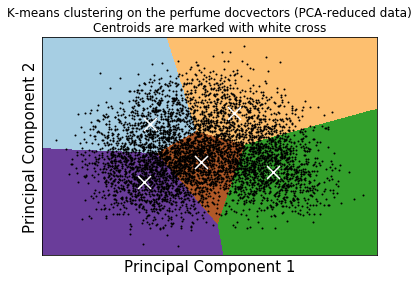

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary
x_min, x_max = PCAresult[:, 0].min() - 1, PCAresult[:, 0].max() + 1
y_min, y_max = PCAresult[:, 1].min() - 1, PCAresult[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh
Z = kmeans_clustering.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(PCAresult[:, 0], PCAresult[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans_clustering.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the perfume docvectors (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.xticks(())
plt.yticks(())
plt.show()

The docvectors form a large continuous blob in this PCA-reduced space. Kmeans separates the space into reasonable clusters, but in order to see what these clusters mean, we will have to do some qualitative cross-checking.

Let's annotate this space with random perfume labels and see what smells each region of space denotes.

Text(4,-7,'Balsamic')

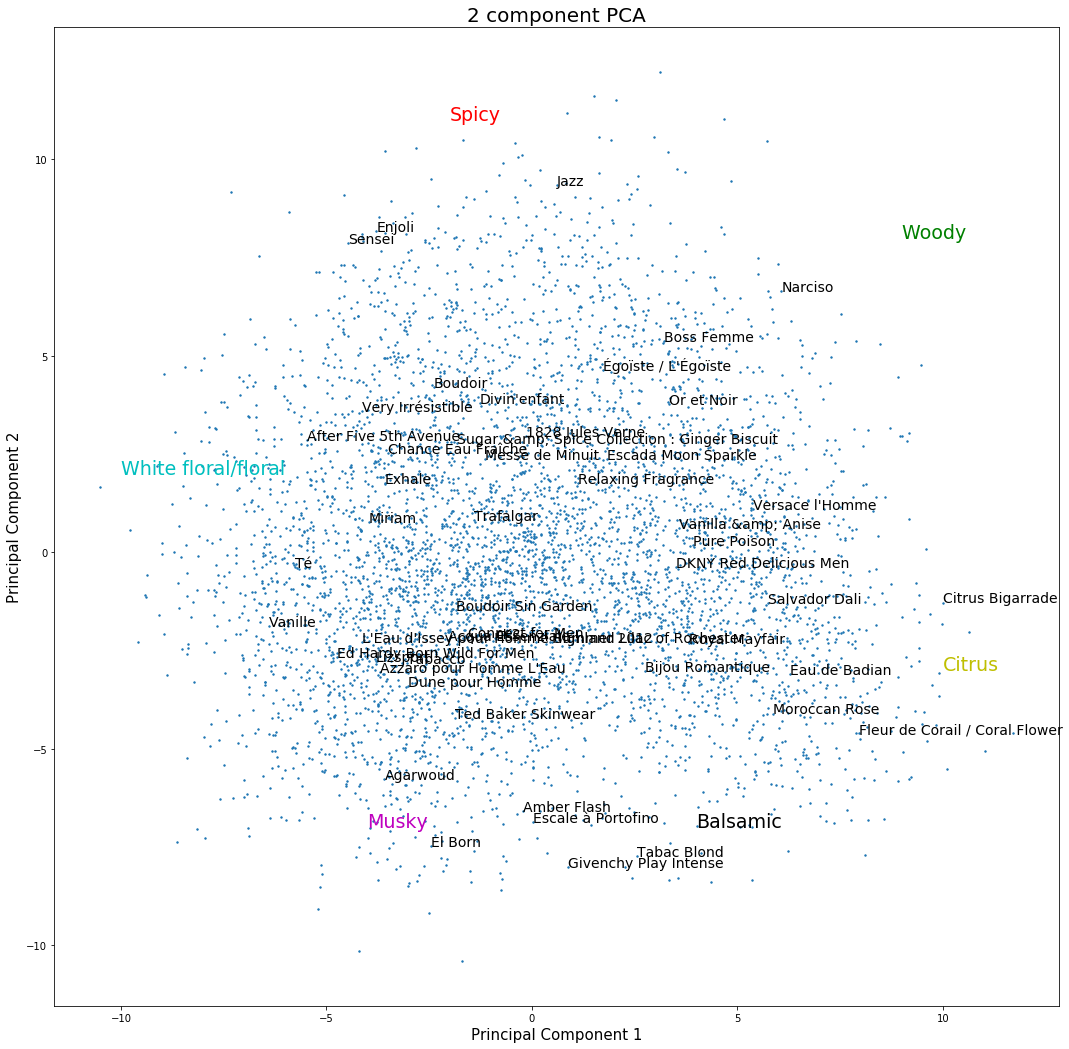

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (18,18))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(PCAresult[:, 0], PCAresult[:, 1], s=2)

#add annotations for a few perfumes
for i, word_centroid in enumerate(word_centroid_list_sort):
    
    if i % 105 == 0:
        pyplot.annotate(word_centroid[0], xy=(PCAresult[i, 0], PCAresult[i, 1]), size=14)

#add category annotations
pyplot.annotate('Spicy', xy=(-2, 11), size=19, color='r')
pyplot.annotate('Woody', xy=(9, 8), size=19, color='g')
pyplot.annotate('White floral/floral', xy=(-10, 2), size=19, color='c')
pyplot.annotate('Musky', xy=(-4, -7), size=19, color='m')
pyplot.annotate('Citrus', xy=(10, -3), size=19, color='y')
pyplot.annotate('Balsamic', xy=(4, -7), size=19, color='k')

In this figure I have roughly labeled the regions by their smell, e.g. citrus, musky, etc. I arrived at these smells by cross-referencing the perfumes in each region by their "main accords" at "fragrantica.com."

That's all I have for this overview/tutorial on the model behind potionfinder.com. Feel free to play around with any of this data and make your own model! Email me at ender314@gmail.com if you have any questions.